Importing the libraries

In [23]:
import pandas as pd
import numpy as np

Importing the dataset

In [24]:
dataset = pd.read_csv("SMSSpamCollection.csv", sep="\t", names=['label', 'message'])
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
x = dataset['message']
y = dataset['label']

Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

Visualizing the Dataset

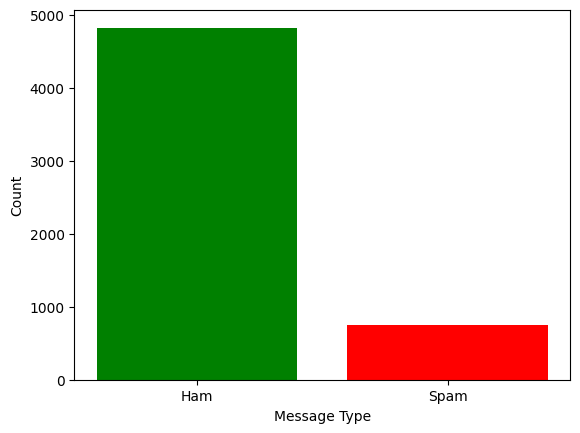

In [27]:
import matplotlib.pyplot as plt

label_counts = dataset['label'].value_counts()
counts = label_counts.values
labels=['Ham', 'Spam']
plt.bar(labels, counts, color=['Green', 'Red'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Count Vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x_train_vec = cv.fit_transform(x_train)
x_test_vec = cv.transform(x_test)

Using Naives Bayes Classifier

In [44]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train_vec, y_train)
pred_nb = nb.predict(x_test_vec)

Performance Metrics of Naive Bayes

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_nb, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       955
        Spam       0.98      0.93      0.96       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Visualizing Naive Bayes

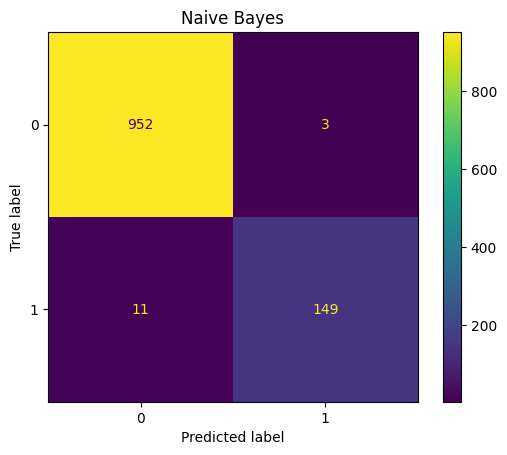

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, pred_nb)
plt.title("Naive Bayes")
plt.show()

Using Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_vec, y_train)
pred_lr = nb.predict(x_test_vec)

Performance Metrics of Logistic Regression

In [48]:
print(classification_report(y_test, pred_lr, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       955
        Spam       0.98      0.93      0.96       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Visualizing Logistic Regression

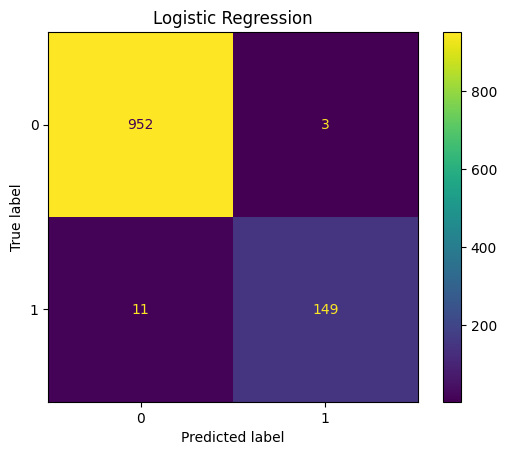

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr)
plt.title("Logistic Regression")
plt.show()